In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploadfile=files.upload()

Saving CCP.csv to CCP (1).csv


In [3]:
df=pd.read_csv('CCP.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def print_unique_values(df):

  for col in df.columns:
    print(f'{col}:{df[col].unique()}')

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print_unique_values(df)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [8]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [9]:
print_unique_values(df)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [10]:
df['gender']=df['gender'].apply(lambda x: 1 if x=='Male' else 0)

In [11]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                'Churn']
len(yes_no_columns)

12

In [12]:
for x in yes_no_columns:
  df[x]=df[x].apply(lambda x: 1 if x=='Yes' else 0)

In [13]:
print_unique_values(df)

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


In [29]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
df1.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [43]:
df2=df1[df1.TotalCharges!=' ']

In [44]:
print_unique_values(df2)

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]
InternetService_DSL:[ True False]
InternetService_Fiber optic:[False  True]
InternetService_No:[False  True]
Contract_Month-to-month:[ True False]
Contract_One year:[False  True]
Contract_Two year:[False  True]
PaymentMethod_Bank transfer (automatic):[False  True]
PaymentMethod_Credit card (automatic):[False  True]
PaymentMethod_Electronic check:[ True False]
PaymentMethod_Mailed che

In [48]:
df3=df2.replace({True:1,False:0})

<ipython-input-48-42a8c6615284>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3=df2.replace({True:1,False:0})


In [52]:
X=df3.drop('Churn',axis='columns')
y=df3['Churn']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [56]:
X_train.shape

(4711, 26)

In [58]:
X_test.shape

(2321, 26)

In [59]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

In [61]:
model.fit(X_train,y_train,epochs=100)
model.evaluate(X_test,y_test)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5679 - loss: 31.8503
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7608 - loss: 0.5738
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7377 - loss: 0.6780
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7460 - loss: 0.8534
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.8488
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7396 - loss: 0.9985
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7494 - loss: 1.0222
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7731 - loss: 0.5675
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7826 - loss: 0.5912
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7666 - loss: 0.8408
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7686 - loss: 0.7136
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━

[0.45725470781326294, 0.7979319095611572]

In [62]:
model.evaluate(X_test,y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4581


[0.45725470781326294, 0.7979319095611572]

In [63]:
y_pred=model.predict(X_test)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [64]:
y_pred[:5]

array([[0.00209133],
       [0.16952161],
       [0.01268264],
       [0.45211983],
       [0.31663957]], dtype=float32)

In [77]:
y_pred_new=[]
for x in y_pred:
  if x>0.5:
    y_pred_new.append(1)
  else:
    y_pred_new.append(0)

In [69]:
y_pred_new

[0, 0, 1, 0, 1]

In [70]:
y_test[:5]

,Churn
5285,0
2384,0
1370,0
3674,1
4144,0


In [78]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1699
           1       0.66      0.52      0.58       622

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



Text(95.72222222222221, 0.5, 'Truth')

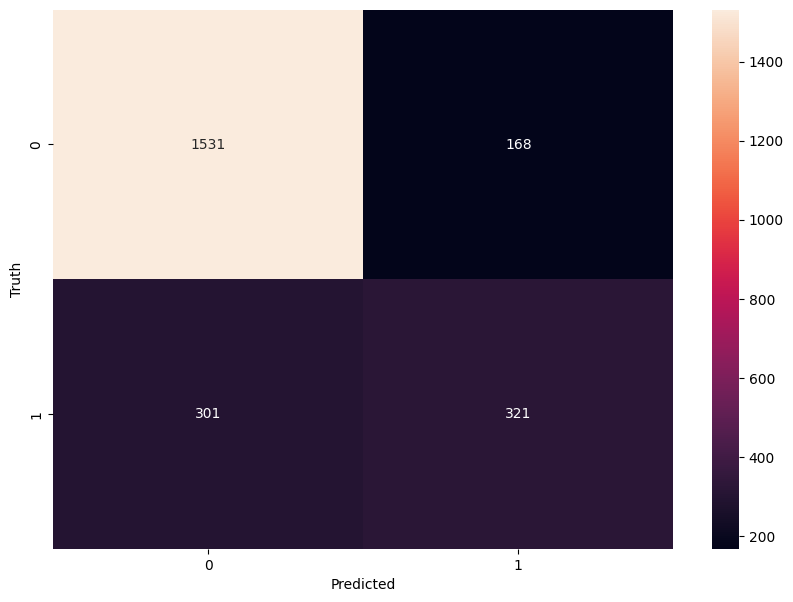

In [83]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_new)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')